# How has Bozeman's 2023 short-term rental law affected Airbnb listings?

**Amanda Wahlers**

**Task:** Explore the effects of Bozeman's December 2023 short-term rental law, which banned new whole-property short-term rentals, limited where in the city STRs could locate, and (essentially) put limits on the number of listings a host can have.

**Data:** Bozeman, Montana, US; August, 2023 - June, 2024; downloaded from Inside Airbnb @ https://insideairbnb.com/get-the-data/

**This notebook contains:**

1. Data cleaning & classification of properties
2. Exploratory analysis

**Quick facts about Bozeman's STR law:**

* Bozeman defines an STR as a listing allowing stays of less than 28 days. 
* Bozeman's short term rental (STR) regulations cracked down most on non-owner-occupied primary housing units (e.g. whole houses or whole apartments with the sole or primary purpose of being an STR). Some existing STRs are grandfathered in, but no new permits are to be granted for this type. 
* The law also limits where in the city STRs can be located. 
* The law essentially also limits the number of listings a host can have in Bozeman, MT (at most 2 private rooms that are located in the host's own residence, one unit in a duplex if the host lives in the other unit, etc). 
* Bozeman also places various regulatory responsibilities on STRs such as requiring hosts to apply for a city-issued permit, health & safety inspections, etc. I haven't fully explored this, but to the best of my knowledge, much of this was implemented in 2017. 

**How we analyze Bozeman's Airbnb data in light of their STR law:**

In our analysis, we highlight the importance of understanding and accurately categorizing listings according to Bozeman's short-term rental (STR) laws, which vary both by the listing type and the minimum stay the listing allows. 

First, Bozeman's law explictly deals with listing types that roughly map onto property types as follows:

Type 1: Private room \
Type 2A,B: Guest house \
Type 3: House/apt \
(This is a bit of simplification & notebably some duplexes/apartments could be classed type 2 depending on the circumstances.)

We re-classify Airbnb listings into the four listing types (private room, guest house, house, and apartment) that roughly map onto these using domain knowledge and an analysis of the shared characteristics of properties in Bozeman's market using Airbnb's broader classification 'room type' and narrower classification 'property type'.

Second, by law, Bozeman only considers an Airbnb listing a "STR" if it accepts bookings less than 28 days in length. Noteable, even prior to the law, roughly 1/5 of Airbnb lsitings in Bozeman were not technically STRs because they only accepted long stays of 28+ days.


**Results:**

We analyze the change in *total listings*, the change in *total active listings* (positive price + at least one day of availability at any time), and the change in *total active STR listings* (active + allows stays shorter than 28 days) between August 2023 and June 2024. 

-------- 
There has been a 7% decrease in the overall number of listings on Airbnb in Bozeman, MT.

There has been a 12% decrease in the overall number of *active* listings on Airbnb in Bozeman, MT.

There has been a 21% decrease in the overall number of *active STR* listings on Airbnb in Bozeman, MT.

-------- 
We find that this decrease in the number of active STR listings is largely driven by a decrease in house (-14%) & apartment (-10%) active STR listings, which are the most numerous listing types in Bozeman and  the kinds of listings at which Bozeman's law is most targeted.

-------- 
We also analyze heterogeneity in these trends by whether the host is local and how many local listings the host has. 

Listings by non-local hosts declined more (-10% versus -4%). 

The number of listings by hosts with multiple local listings decreased a similar amount to those hosted by hosts with one local listing (-11/-12%).

-------- 
We also assess whether all Airbnb listings include an active STR Hosting Permit Number, as required by Bozeman since August 2023.

A naive analysis would suggest that of all Airbnb listings in Bozeman, 25% did not display a permit number as of June 2024. However, of all *active listings accepting bookings for less than 28+ days* (which is Bozeman's definition of a "STR"), 97% displayed one. 

-------- 
**Conclusion & next steps:**

Our results suggest that Bozeman's 2023 STR law has reduced the number of STRs in Bozeman by 21% between August 2023 and June 2024, most notably by reducing the number of listings of houses (-14%) and apartments (-10%). 

However, this analysis also highlights that, in the short term, roughly half of this observed decrease in STRs in Bozeman has occurred as the result of a reshuffling of properties from "short-term rental" listings (accepting stays less than 28 days) to "medium-term rental" listings (only accepting stays 28+ days). Since the primary goal of Bozeman's STR law is to prevent STRs from adversely impacting the local supply of long-term rental units and houses for sale, this reshuffling effect is not necessarily desirable. However, it remains to be seen in the longer term whether hosts will find this constraint of only being able to accept bookings longer than 28 days to be as profitable as converting the property to a long-term rental or selling it.

Next steps in this project include establishing a formal causal relationship between Bozeman's law and the observed changes in Airbnb listings, exploring whether the law has had a measurable effect on rental and housing prices, exploring whether the law has had a measurable effect on the lodging or toursim industries (e.g. through reduced competition or a dearth of lodging options), exploring further heterogeneity in the law's effects, and using Bozeman's new STR zoning map to explore geographic variation.

## Library Imports

In [3]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Goepandas for GIS
import geopandas as gpd

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('white')

## Data Cleaning

### Read in Bozeman Airbnb data for Aug 2023 - June 2024 

In [6]:
# Intialize an empty list to store each month of data
data_frames = []

# Loop through 2023 months
for n in [8, 9, 10, 11, 12]: 
    # Read each file into a DataFrame
    df = pd.read_csv(f'Data/{n}_23_listings_detail.csv', index_col='id')
    # Append month to the list
    data_frames.append(df)

# Loop through 2024 months (March is first 2024 month available on Inside Airbnb)
for n in [3, 4, 5, 6]: 
    # Read each file into a dataframe
    df = pd.read_csv(f'Data/{n}_24_listings_detail.csv', index_col='id')
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate dataframes in the list into a single dataframe
listings = pd.concat(data_frames)

In [7]:
# Create date variable consisting of year and month of the web scrape
listings['date'] = listings.scrape_id.astype(str).str[:8]
listings['date'] = pd.to_datetime(listings['date'], format='%Y%m%d')

In [8]:
listings.date.value_counts()

date
2023-08-10    602
2023-12-10    594
2023-09-04    578
2023-11-10    578
2023-10-08    568
2024-06-14    560
2024-05-11    554
2024-04-17    552
2024-03-19    544
Name: count, dtype: int64

In [9]:
# Drop duplicates
print(listings.shape)
listings = listings.drop_duplicates()
print(listings.shape)

(5130, 75)
(5130, 75)


In [10]:
# Drop features for which all values are missing
print(listings.shape)
listings.dropna(axis="columns", how="all", inplace=True)
print(listings.shape)

(5130, 75)
(5130, 73)


In [11]:
# Keep features that are relevant to the task at hand
listings = listings[['date', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'first_review', 
                     'last_review', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability',
                     'availability_30', 'availability_365',
                     'host_id', 'host_location', 'host_since', 'host_is_superhost', 'number_of_reviews', 'license',
                     'review_scores_rating', 'instant_bookable', 'minimum_nights', 'minimum_minimum_nights', 
                     'calculated_host_listings_count']]

In [12]:
# Rename some columns
listings.rename(columns={'host_since': 'host_user_since', 'accommodates':'max_guests'}, inplace=True)

In [13]:
# Convert objects that should be numeric types

# Bathrooms (string -> float)
listings.bathrooms_text.unique()
listings.bathrooms_text.replace('Half-bath', '0.5 baths', inplace=True)
listings['bathrooms'] = listings['bathrooms_text'].str.split(' ').str[0].astype(float)
listings[['bathrooms', 'bathrooms_text']].head(20)
listings.bathrooms.unique()

# Price (string -> float, missing values -> 0 (investigate this later))
listings['price_str'] = listings['price'].copy()
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
listings[['price', 'price_str']].head()
listings.price.describe()
listings.price.fillna(0, inplace=True) 
listings.price.isna().sum()

# Instant bookable (str -> indicator)
listings['instant_bookable'].unique()
print(listings['instant_bookable'].isna().sum())
listings['instant_bookable'] = (listings['instant_bookable'] == 't').astype(int)
listings['instant_bookable'].unique()

# Bedrooms (string -> int)
listings['bedrooms'] = listings['bedrooms'].astype('Int64')
listings.groupby('room_type').bedrooms.value_counts()
listings.bedrooms.fillna(0, inplace=True) # Seems likely that this indicates 0 "bedroooms" (studio, private room, tent, etc)
listings['bedrooms'] = listings['bedrooms'].astype(int)

# Beds (fill in a few missing beds with the # of bedrooms - presumably there is 1 bed(ish thing) in a 1 bedroom space)
listings.beds.isna().sum()
listings[listings['beds'].isna()].head()
listings.beds.fillna(listings.bedrooms, inplace=True) 

# Superhost status (string -> indicator)
listings['host_is_superhost'].unique()
listings['host_is_superhost'].isna().sum()
listings['host_is_superhost'] = (listings['host_is_superhost'] == 't').astype(int)
listings['host_is_superhost'].mean()

# Has availability (string -> indicator)
listings['has_availability'].unique()
listings['has_availability'].isna().sum()
listings['has_availability'] = (listings['has_availability'] == 't').astype(int)
listings['has_availability'].mean()

# Availability over the next 365 days (# of days -> indicator)
#(listings.has_availability == (listings.availability_365 >0 )).mean()
listings['avail_365'] = (listings['availability_365'] > 0).astype(int)
listings['avail_365'].mean()

# Drop columns we no longer need
listings.drop(listings[['price_str', 'bathrooms_text']], axis=1, inplace=True)

0


In [14]:
# Convert dates to datetimes
listings['first_review'] = pd.to_datetime(listings['first_review'], format='%Y-%m-%d')
listings['last_review'] = pd.to_datetime(listings['last_review'], format='%Y-%m-%d')
listings['host_user_since'] = pd.to_datetime(listings['host_user_since'], format='%Y-%m-%d')

In [15]:
# Flag and fill missing values
listings.isna().sum()

listings['no_reviews'] = listings.first_review.isna().astype(int)
listings.first_review.fillna(pd.Timestamp('1970-01-01'), inplace=True)
listings.last_review.fillna(pd.Timestamp('1970-01-01'), inplace=True)
listings.review_scores_rating.fillna(0, inplace=True)

listings.host_location.fillna('Unknown', inplace=True)

In [16]:
# Create indicator for listing has a license (req'd to be added to listing as of 8/2023 by Bozeman)
listings['has_license'] = listings.license.notna()
listings['has_license'].mean()

# Drop unneeded column
listings.drop(listings[['license']], axis=1, inplace=True)

In [17]:
# Check whether missing values remain
if listings.isna().any().any():
    print("There are missing values:")
    print(listings.isna().sum())
else:
    print('Yay, none!')

Yay, none!


#### Categorize listings by type using pre-period characteristics (price, # bed) & domain knowledge

In [19]:
# View how property types map onto room types
listings.groupby(listings.room_type).property_type.value_counts()

room_type        property_type                    
Entire home/apt  Entire home                          1665
                 Entire condo                          891
                 Entire rental unit                    828
                 Entire townhouse                      549
                 Entire guesthouse                     337
                 Entire guest suite                    205
                 Entire cottage                         47
                 Entire bungalow                        41
                 Entire serviced apartment              34
                 Entire loft                            27
                 Camper/RV                              15
                 Tent                                    9
                 Entire vacation home                    9
                 Entire place                            9
                 Entire chalet                           9
                 Entire cabin                            9
Hotel

In [20]:
# Assign new listing types based on domain knowledge and shared characteristics in this market
listings['listing_type'] = listings['property_type'].copy()

# Hotel (Listed on Airbnb, but governed by hotel rules rather than STR rules)
listings['listing_type'].replace(['Room in boutique hotel', 'Room in hostel', 'Shared room in hostel'], 'hotel', inplace=True)
                                  
# House
listings['listing_type'].replace(['Entire home','Entire townhouse', 'Entire bungalow', 'Entire chalet',
                                  'Entire cabin', 'Entire vacation home'], 'house', inplace=True)
# Apartment                                  
listings['listing_type'].replace(['Entire condo', 'Entire rental unit'], 'apt', inplace=True)
                                  
# Guest Suite                                 
listings['listing_type'].replace(['Entire guesthouse', 'Entire guest suite', 'Entire cottage', 'Entire loft', 'Entire place'], 'guest suite', inplace=True)

# Private room (not hotel)                             
listings['listing_type'].replace(['Private room in home', 'Private room in townhouse', 'Private room in rental unit', 
                          'Private room in guesthouse', 'Private room in bed and breakfast', 
                          'Private room in condo', 'Private room in guest suite'], 'private room', inplace=True)

# Other                             
listings['listing_type'].replace(['Camper/RV', 'Tent'], 'other', inplace=True)

# Assess groupings
print(listings['listing_type'].value_counts())

listing_type
house                        2282
apt                          1719
guest suite                   625
private room                  316
hotel                         130
Entire serviced apartment      34
other                          24
Name: count, dtype: int64


### Create important indicator variables: downtown, only accepts long stays, host has multiple listings in Bozeman, local host, likely_grandfathered

In [22]:
# Downtown
#sns.lmplot(x='longitude', y='latitude', hue='price', palette='rocket_r', data=listings, scatter=True, legend=False, fit_reg=False)

listings['downtown'] = (listings.longitude.between(-111.06,-111.02) & listings.latitude.between(45.66, 45.69)).astype(int)
#sns.lmplot(x='longitude', y='latitude', hue='downtown', palette='rocket_r', data=listings, scatter=True, legend=False, fit_reg=False)

In [23]:
# Only allows long stays (28+ days) only
# Bozeman's STR regulations apply to periods of occupancy of less than 28 consecutive days
listings.minimum_minimum_nights.value_counts()
listings['long_stays_only'] = (listings.minimum_minimum_nights >=28).astype(int)
listings.groupby('listing_type').long_stays_only.mean()
listings.long_stays_only.value_counts()

long_stays_only
0    4172
1     958
Name: count, dtype: int64

In [24]:
# Host has multiple listings in Bozeman
#plt.hist(listings.calculated_host_listings_count, bins=25)
listings.calculated_host_listings_count.describe()

# Create indicator for 3+ listings ('job' rather than 'side_hustle')
listings['two_plus_listings']  = (listings.calculated_host_listings_count > 1).astype(int)
listings['two_plus_listings'].mean()

0.5179337231968811

In [25]:
# Host is local (location = Bozeman)
listings.host_location.value_counts()

listings['host_local'] = (listings.host_location == 'Bozeman, MT').astype(int)
listings['host_local'].mean()

0.6896686159844054

In [26]:
# Has license or not
listings.has_license.mean()

0.36744639376218324

In [27]:
# Listing could be grandfathered in because it operated prior to 2017 law or 2023 law
listings['pre_2017'] = listings.first_review < pd.Timestamp('2017-01-01')
listings['pre_2023'] = listings.first_review < pd.Timestamp('2023-12-13')
print(listings.pre_2017.mean(), listings.pre_2023.mean())

0.17894736842105263 0.9783625730994152


In [28]:
# Listing gets reclassified (e.g. from apt to guest house or something)

### Break out some features by listing type

In [30]:
# Create dummies for listing type and keep the original column
listings2 = pd.get_dummies(listings, columns=['listing_type'], dtype=int)
listings2['listing_type'] = listings['listing_type'].copy()
listings  = listings2.copy() 


In [31]:
# Interact key features with listing type 
type_list    = ['listing_type_apt','listing_type_guest suite', 'listing_type_house', 'listing_type_private room']
feature_list = ['max_guests', 'bedrooms', 'bathrooms']

for f in feature_list:
    for m in type_list:
        listings['{}_{}'.format(m,f)] = listings[m]*listings[f]

In [32]:
# Assert no missing values remain
assert all(listings.isna().sum()) == 0


In [33]:
listings.to_csv('Data/expl_bt.csv', index=True)

## Exploratory Analysis

### Key Facts:

Bozeman's short term rental (STR) regulations cracked down most on primary housing units (e.g. whole houses, whole apartments).

Bozeman's STR limitations only applies to STR that allow "transient occupancy" of less than 28 days.

The law essentially also limits the number of listings a host can have in Bozeman, MT (at most 2 private rooms that are located in the host's own residence, one unit in a duplex if the host lives in the other unit, etc). 

In [36]:
# Create groupings: Total listings, total active listings, total active STR listings

# 1. Number of Airbnbs listed in each month (total number scraped from Airbnb)
monthly_counts = listings.groupby('date').size()

# 2. Filter to "active" listings - listings with a non-zero price and with availability in the future 
# (e.g. a listing could still 'exist' on Airbnb, but not be accepting bookings, thus essentially 'inactive')
active_listings = listings[(listings['price'] > 0) & (listings['has_availability'] == 1)]
# Group by month and count the number of observations
active_monthly_counts = active_listings.groupby('date').size()

# 3. Filter to "active" STR listings - listings with price > 0, availability, AND allowing STR (stays < 28+ days)
active_str_listings = listings[(listings['price'] > 0) & (listings['has_availability'] == 1) & (listings['long_stays_only'] == 0)]
# Group by month and count the number of observations
active_str_monthly_counts = active_str_listings.groupby('date').size()

#### There are 7% fewer Airbnb listings in Bozeman after the law. There are 12% fewer active listings  (positive listing price and availability on the calendar for the next year). There are 21% fewer active STR listings (active + allow stays shorter than 28 days).

In [38]:
print('Decrease in listings:',round((1- monthly_counts.iloc[-1]/monthly_counts.iloc[0])*100),'%')
print('Decrease in active listings:',round((1- active_monthly_counts.iloc[-1]/active_monthly_counts.iloc[0])*100),'%')
print('Decrease in active STR listings:',round((1- active_str_monthly_counts.iloc[-1]/active_str_monthly_counts.iloc[0])*100),'%')

Decrease in listings: 7 %
Decrease in active listings: 12 %
Decrease in active STR listings: 21 %


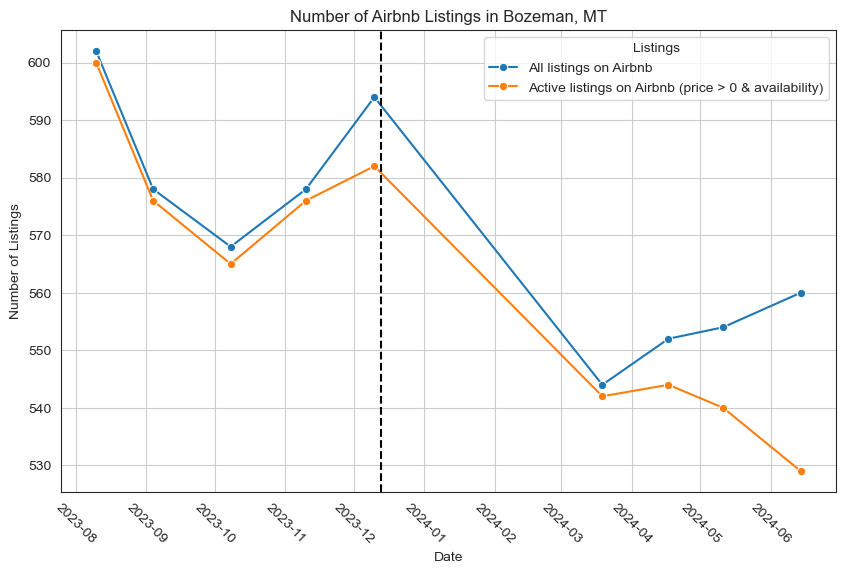

In [39]:
# Plot trends in number of listings & active listings
plt.figure(figsize=(10, 6))
sns.lineplot(monthly_counts, marker='o', label='All listings on Airbnb')
sns.lineplot(active_monthly_counts, marker='o', label='Active listings on Airbnb (price > 0 & availability)')
#sns.lineplot(active_str_monthly_counts, label='Active STR listings on Airbnb (price > 0, availability, allows stays <28 days)')

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot
plt.ylabel('Number of Listings')
plt.xlabel('Date')
plt.xticks(rotation=-45)
plt.legend(title='Listings')
plt.title('Number of Airbnb Listings in Bozeman, MT')
plt.grid(True)
plt.show()

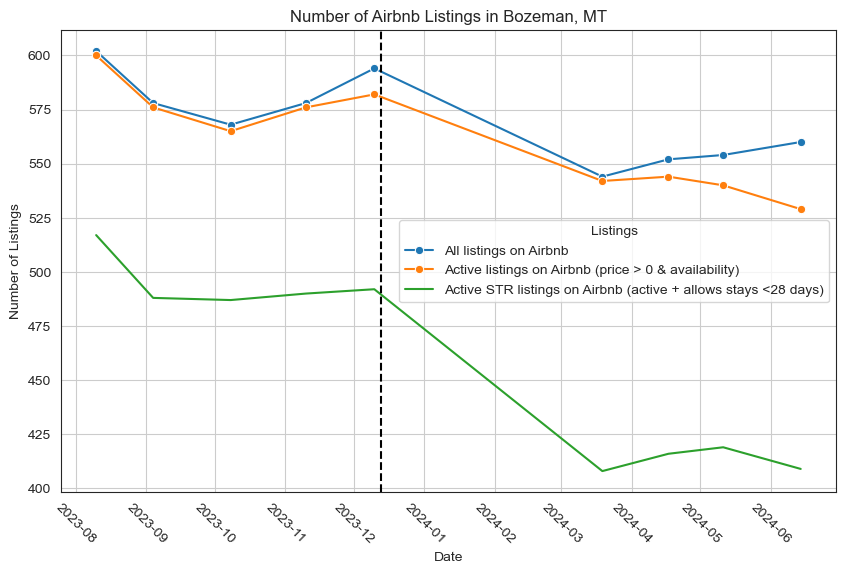

In [40]:
# Plot trends in number of listings & active listings & active STR listings
plt.figure(figsize=(10, 6))
sns.lineplot(monthly_counts, marker='o', label='All listings on Airbnb')
sns.lineplot(active_monthly_counts, marker='o', label='Active listings on Airbnb (price > 0 & availability)')
sns.lineplot(active_str_monthly_counts, label='Active STR listings on Airbnb (active + allows stays <28 days)')

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot
plt.ylabel('Number of Listings')
plt.xlabel('Date')
plt.xticks(rotation=-45)
plt.legend(title='Listings')
plt.title('Number of Airbnb Listings in Bozeman, MT')
plt.grid(True)
plt.show()

#### There are slightly fewer active house, apartment, and private room listings after the law.

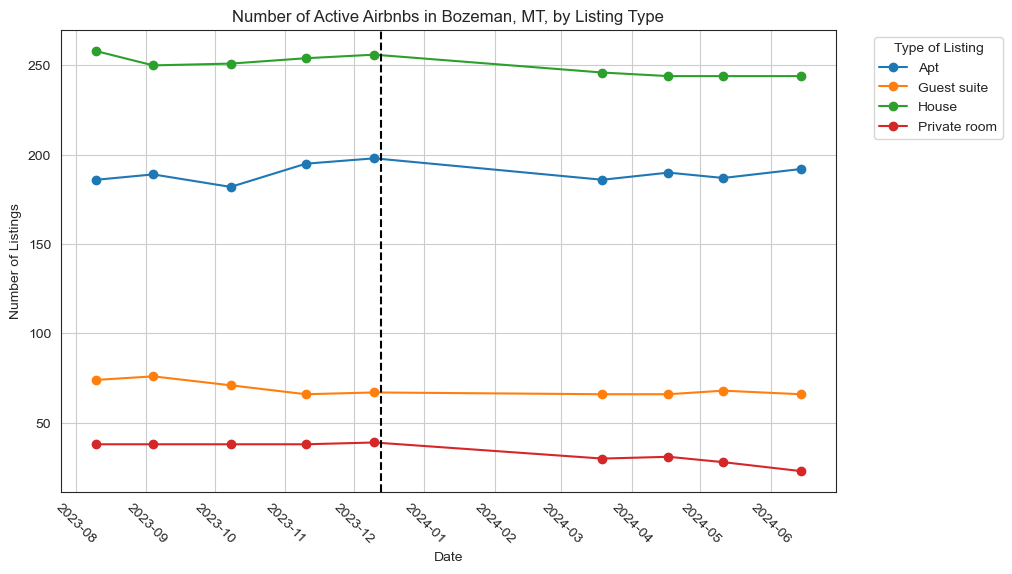

In [42]:
# Number of active Airbnbs listed in each month by type (price > 0 & availability)
active_listings_type = listings[(listings['price'] > 0) & (listings['has_availability'] == 1) & listings.listing_type.isin(['apt','house','guest suite','private room'])]
monthly_counts_type = active_listings_type.groupby(['date', 'listing_type']).size().reset_index(name='count')

# Plot a line for each listing type
plt.figure(figsize=(10, 6))
for key, grp in monthly_counts_type.groupby('listing_type'):
    plt.plot(grp['date'], grp['count'], marker='o', label=key.capitalize())

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot 
plt.title('Number of Active Airbnbs in Bozeman, MT, by Listing Type')
plt.xlabel('Date')
plt.xticks(rotation=-45)
plt.ylabel('Number of Listings')
plt.grid(True)
plt.legend(title='Type of Listing', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()


#### There are fewer active house (-14%) & apartment-type (-10%) listings that accept short stays (minimum stay < 28+ days).

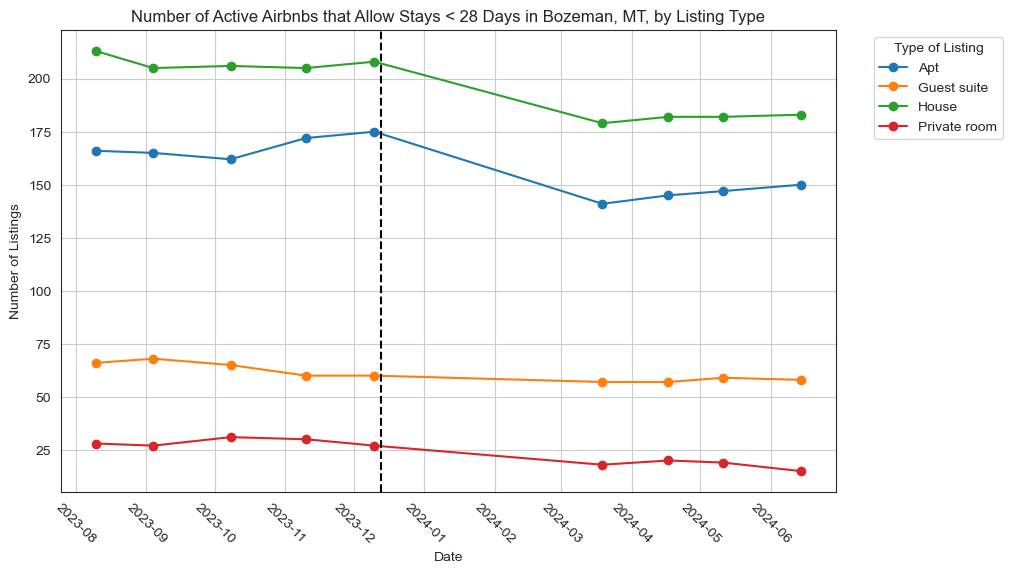

In [44]:
# Number of active STR Airbnbs listed in each month by type
active_str_listings_type = listings[(listings['price'] > 0) & (listings['has_availability'] == 1) & (listings['long_stays_only'] == 0) & listings.listing_type.isin(['apt','house','guest suite','private room'])]
monthly_counts_type = active_str_listings_type.groupby(['date', 'listing_type']).size().reset_index(name='count')

# Plot a line for each listing type
plt.figure(figsize=(10, 6))
for key, grp in monthly_counts_type.groupby('listing_type'):
    plt.plot(grp['date'], grp['count'], marker='o', label=key.capitalize())

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot
plt.title('Number of Active Airbnbs that Allow Stays < 28 Days in Bozeman, MT, by Listing Type')
plt.xlabel('Date')
plt.xticks(rotation=-45)
plt.ylabel('Number of Listings')
plt.legend(title='Type of Listing', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.grid(True)
plt.show()

In [45]:
# Quickly grab some stats
#monthly_counts_type

#### Listings are more likely to only accept long stays (28+ days) after law.

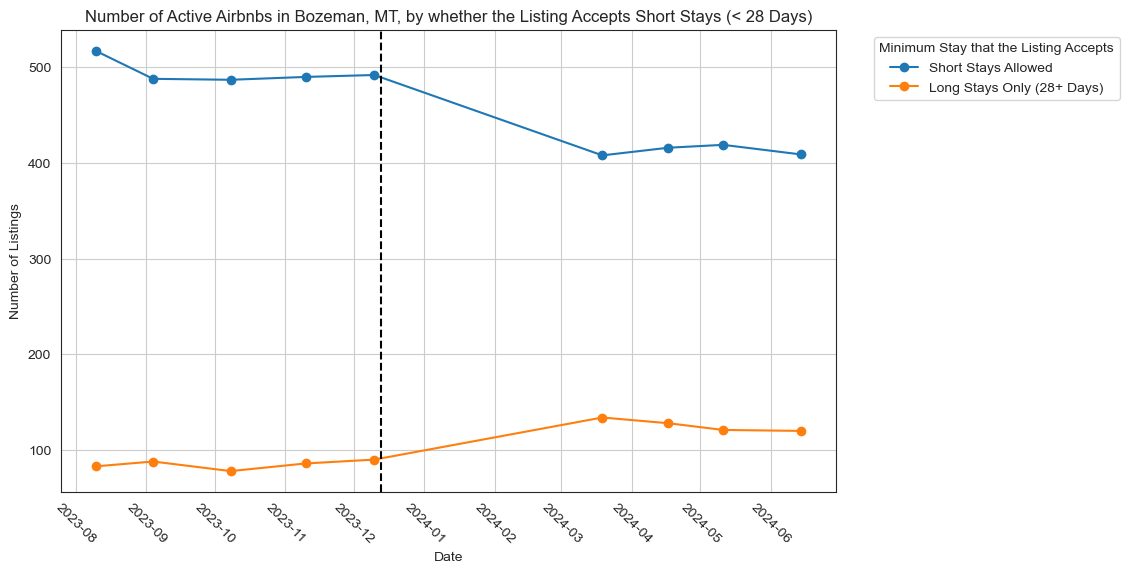

In [47]:
# Number of active Airbnbs listed in each month by STR or long-term stays only
monthly_counts_type = active_listings.groupby(['date', 'long_stays_only']).size().reset_index(name='count')

# Plot a line for each listing type
plt.figure(figsize=(10, 6))
label_name = {0: 'Short Stays Allowed', 1: 'Long Stays Only (28+ Days)'}
for key, grp in monthly_counts_type.groupby('long_stays_only'):
    plt.plot(grp['date'], grp['count'], marker='o', label=label_name[key])

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot
plt.title('Number of Active Airbnbs in Bozeman, MT, by whether the Listing Accepts Short Stays (< 28 Days)')
plt.xlabel('Date')
plt.xticks(rotation=-45)
plt.ylabel('Number of Listings')
plt.legend(title='Minimum Stay that the Listing Accepts', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Interestingly, the number of non-standard listing types (hotels, luxury serviced apartments, tents) on Airbnb also decreases. Hotels and luxury serviced apartments are likely able to advertise on their own platforms in addition to Airbnb, so this does not necessarily mean they closed. Bozeman's STR regulations generally don't apply to hotels, but it's possible some of the listings identifying as a 'hostel' were actually private rooms for rent in ordinary houses and thus could have been effected by the STR regulations.

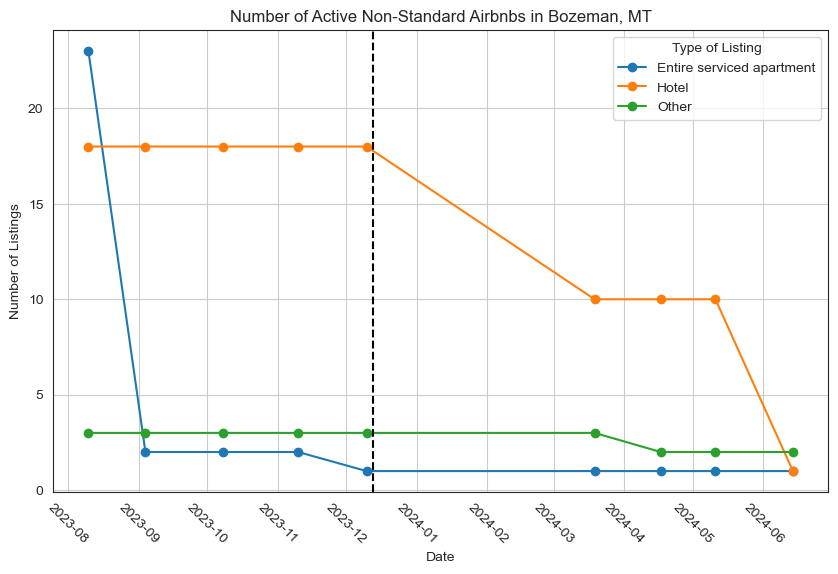

In [49]:
# Check out what happens to non-standard listing types (hotels, etc.)
active_listings_type = listings[(listings['price'] > 0) & (listings['has_availability'] == 1) & ~listings.listing_type.isin(['apt','house','guest suite','private room'])]
monthly_counts_type = active_listings_type.groupby(['date', 'listing_type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))

# Plot a line for each listing type
for key, grp in monthly_counts_type.groupby('listing_type'):
    plt.plot(grp['date'], grp['count'], marker='o', label=key.capitalize())

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

plt.title('Number of Active Non-Standard Airbnbs in Bozeman, MT')
plt.xlabel('Date')
plt.xticks(rotation=-45)
plt.ylabel('Number of Listings')
plt.legend(title='Type of Listing')
plt.grid(True)
plt.show()

### The number of active listings declined more for non-local hosts after the law. -10% for non-local hosts, -3% for local hosts.

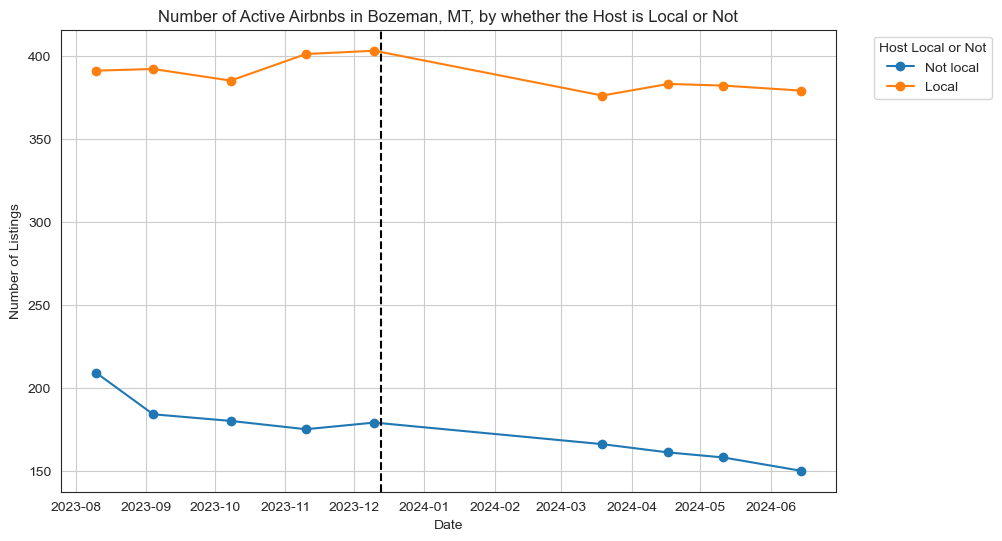

In [51]:
# Number of Airbnbs listed by whether the host lives locally (according to their Airbnb profile)
monthly_counts_type = active_listings.groupby(['date', 'host_local']).size().reset_index(name='count')

# Plot a line for each
plt.figure(figsize=(10, 6))
label_name={0:'Not local', 1:'Local'}
for key, grp in monthly_counts_type.groupby('host_local'):
    plt.plot(grp['date'], grp['count'], marker='o', label=label_name[key])

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot
plt.title('Number of Active Airbnbs in Bozeman, MT, by whether the Host is Local or Not')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.legend(title='Host Local or Not', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.grid(True)
plt.show()

In [52]:
# Grab some quick stats
# monthly_counts_type

#### Listings hosted by hosts with multiple local listings declined more than those hosted by hosts with a single local listing.

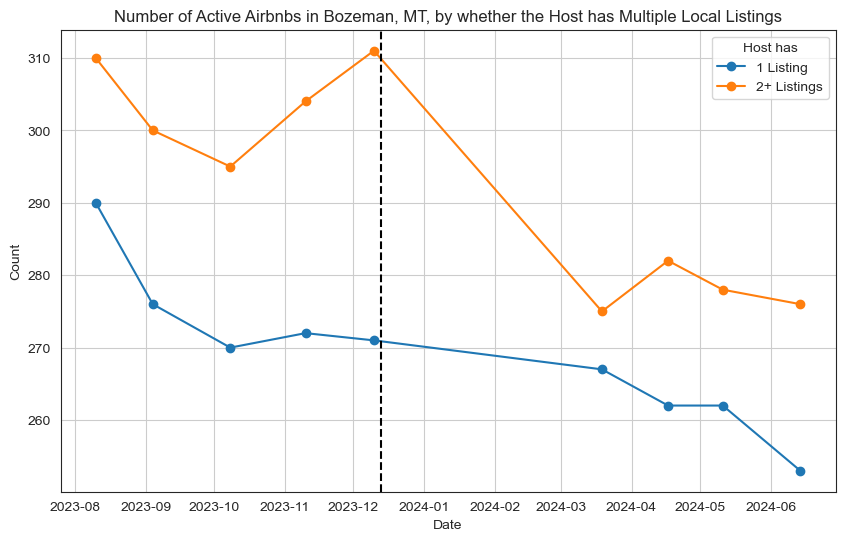

In [54]:
# Number of Airbnbs listed by how many local listings the host has
monthly_counts_type = active_listings.groupby(['date', 'two_plus_listings']).size().reset_index(name='count')

# Plot a line for each 
plt.figure(figsize=(10, 6))
label_name={0:'1 Listing', 1:'2+ Listings'}
for key, grp in monthly_counts_type.groupby('two_plus_listings'):
    plt.plot(grp['date'], grp['count'], marker='o', label=label_name[key])

# Mark effective date of STR ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Plot
plt.title('Number of Active Airbnbs in Bozeman, MT, by whether the Host has Multiple Local Listings')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Host has')
plt.grid(True)
plt.show()

In [55]:
# Grab some quick stats
#monthly_counts_type

#### An August 11, 2023 law requires listings in Bozeman to have an active STR Hosting Permit Number displayed on all hosting platforms. Of all listings, 25% lack a displayed permit number. However, of all active listings accepting bookings for less than 28+ days (which is Bozeman's definition of a "STR"), 97% have one. 

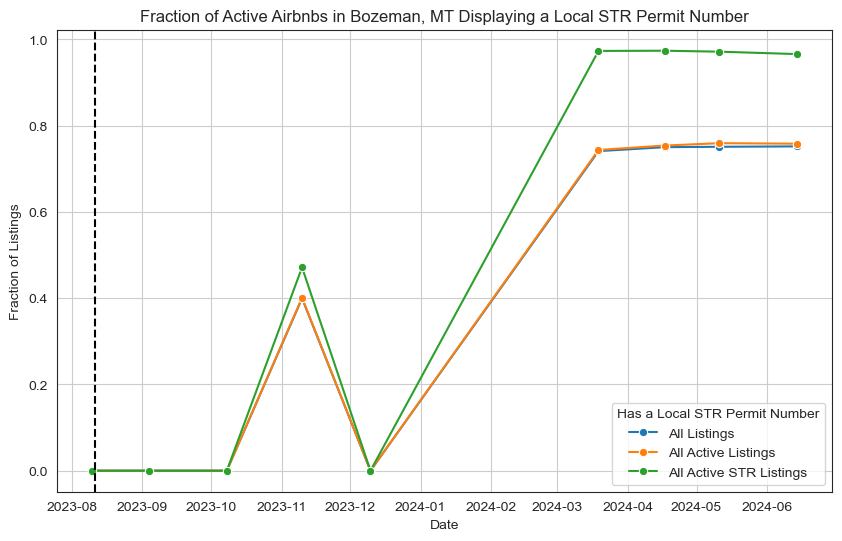

In [57]:
# Number of Airbnbs by whether the listing has a local permit #
monthly_counts = listings.groupby(['date'])['has_license'].mean().reset_index(name='percent')
active_monthly_counts = active_listings.groupby(['date'])['has_license'].mean().reset_index(name='percent')
active_str_monthly_counts = active_str_listings.groupby(['date'])['has_license'].mean().reset_index(name='percent')

# Plot a line for each 
plt.figure(figsize=(10, 6))

sns.lineplot(x='date', y='percent', data=monthly_counts, marker='o', label='All Listings')
sns.lineplot(x='date', y='percent', data=active_monthly_counts, marker='o', label='All Active Listings')
sns.lineplot(x='date', y='percent', data=active_str_monthly_counts, marker='o', label='All Active STR Listings')

# Mark effective date of license ordinance
plt.axvline(x=pd.Timestamp('2023-08-11'), color='k', linestyle='--')

# Customize the plot
plt.title('Fraction of Active Airbnbs in Bozeman, MT Displaying a Local STR Permit Number')
plt.xlabel('Date')
plt.ylabel('Fraction of Listings')
plt.legend(title='Has a Local STR Permit Number')
plt.grid(True)
plt.show()

In [58]:
print('% of listings with a permit:',round((monthly_counts.percent.iloc[-1])*100),'%')
print('% of active listings with a permit:',round((active_monthly_counts.percent.iloc[-1])*100),'%')
print('% of active STR listings with a permit:',round((active_str_monthly_counts.percent.iloc[-1])*100),'%')

% of listings with a permit: 75 %
% of active listings with a permit: 76 %
% of active STR listings with a permit: 97 %


#### Bozeman has gone through two main rounds of STR laws. The first was in 2017 and the second was in 2023. In both cases, exceptions were made for existing listings that could in some circumstances continue to operate by being grandfathered into the previous regime.

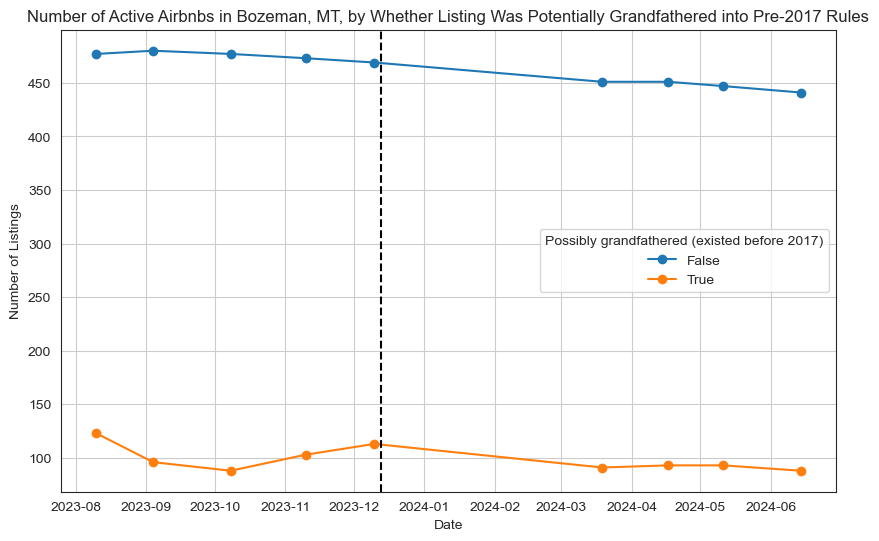

In [60]:
# Number of Airbnbs listed in each month by type
monthly_counts_type = active_listings.groupby(['date', 'pre_2017']).size().reset_index(name='count')

# Plot a line for each 
plt.figure(figsize=(10, 6))
for key, grp in monthly_counts_type.groupby('pre_2017'):
    plt.plot(grp['date'], grp['count'], marker='o', label=key)

# Mark effective date of license ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Customize the plot
plt.title('Number of Active Airbnbs in Bozeman, MT, by Whether Listing Was Potentially Grandfathered into Pre-2017 Rules')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.legend(title='Possibly grandfathered (existed before 2017)')
plt.grid(True)
plt.show()

#### When the law constrains the supply of STR listings, do STR prices rise? Clearly prices vary dramatically seasonally (not surprising!), so I'll request additional months of data to assess this. June is still a bit early to visit Montana, whereas August is prime summer season.

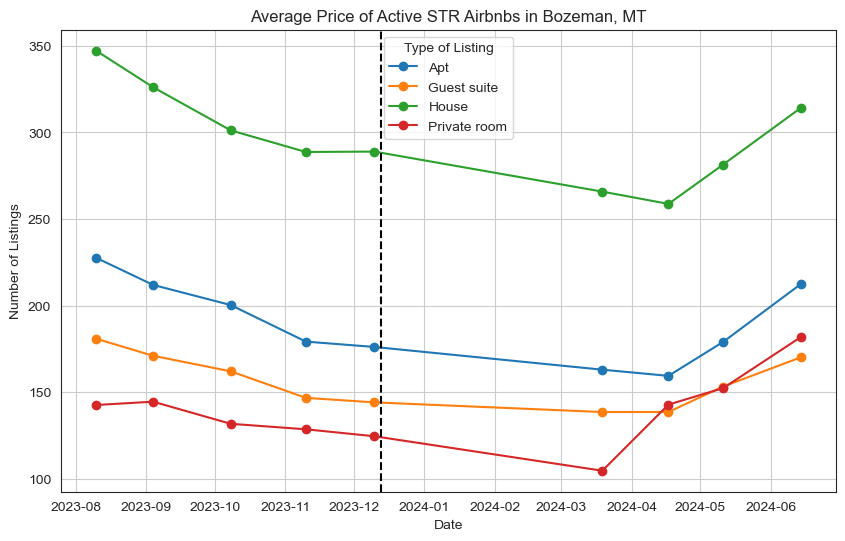

In [62]:
# Plot average price for active STR listings (does decreased supply -> increased prices?)
active_str_listings_type = listings[(listings['price'] > 0) & (listings['has_availability'] == 1) & (listings['long_stays_only'] == 0) & listings.listing_type.isin(['apt','house','guest suite','private room'])]
monthly_counts_type = active_str_listings_type.groupby(['date', 'listing_type'])['price'].mean().reset_index(name='mean_price')

# Plot a line for each type
plt.figure(figsize=(10,6))
for key, val in monthly_counts_type.groupby('listing_type'):
    plt.plot(val['date'], val['mean_price'], marker = 'o', label= key.capitalize())

# Mark effective date of license ordinance
plt.axvline(x=pd.Timestamp('2023-12-13'), color='k', linestyle='--')

# Customize the plot
plt.title('Average Price of Active STR Airbnbs in Bozeman, MT')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.legend(title='Type of Listing')
plt.grid(True)
plt.show()

### Up next

#### When the law constrains the supply of STR listings, do STR occupancy rates rise?

Inside Airbnb's scraped calendar data seems to be an imperfect once-a-month snapshot of the calendars of listings that captures how many days are booked and how many are open. This can be a misleading occupancy measure across types of listings. For example, even if houses and private rooms have identical occupancy rates in reality, if houses book out farther in advance while private rooms book last-minute, this measure would incorrectly suggest that houses have higher occupancy rates when measured by a once-a-month snapshot. 

However, we should still be able to use this measure to compare occupancy across time within a given type under the assumption that there aren't trends in bookings being made farther in advance or more last-minute between 2023 & 2024.

In [65]:
# Plot monthly occupancy using calendar data 

#### How do the characteristics of listings that remain active and those that exit differ?

In [67]:
# Plot characteristics of listings that exited versus didn't

#### How does the distribution of minimum stays allowed change after the law?

In [69]:
# Plot minimum stay allowed barchart in Aug 2023 v. June 2024